In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR  


## Data Collection & Analysis

In [2]:
## Load the dataset

data = pd.read_csv('C:/Users/HP/Documents//insurance.csv')
data.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
## correlation matrix
corr_matrix = data.corr(numeric_only= True)
corr_matrix


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

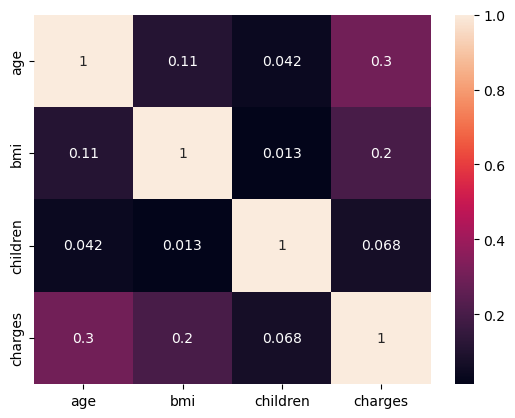

In [7]:
## heatmap
sns.heatmap(corr_matrix, annot=True)

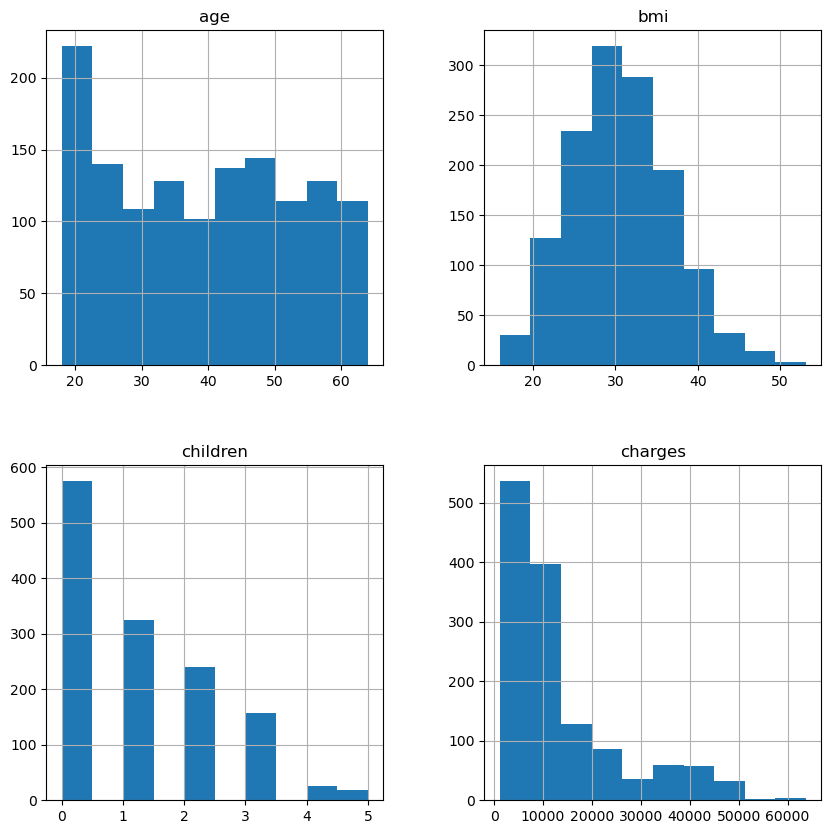

In [8]:
## histogram for each variable
data.hist(bins = 10, figsize = (10, 10))
plt.show()

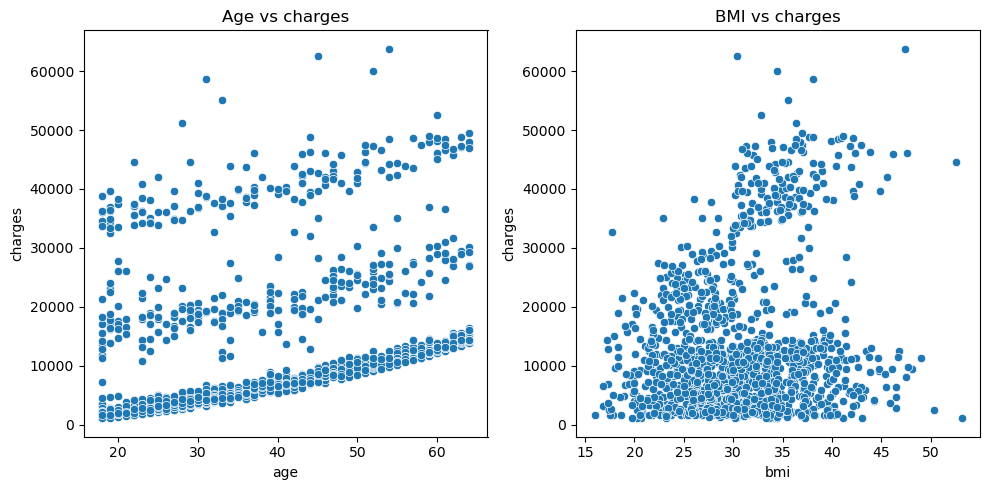

In [28]:
# Scatter plots for continuous variables (age, BMI) vs. insurance cost
plt.figure(figsize=(10, 5))

# Age vs charges
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='age', y='charges')
plt.title('Age vs charges')

# BMI vs charges
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI vs charges')

plt.tight_layout()
plt.show()





c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


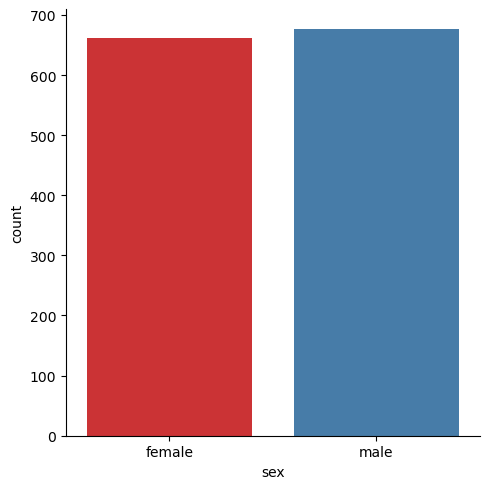

In [10]:
# Count plot for the 'sex' feature
sns.catplot(x="sex", kind="count", palette="Set1", data=data)

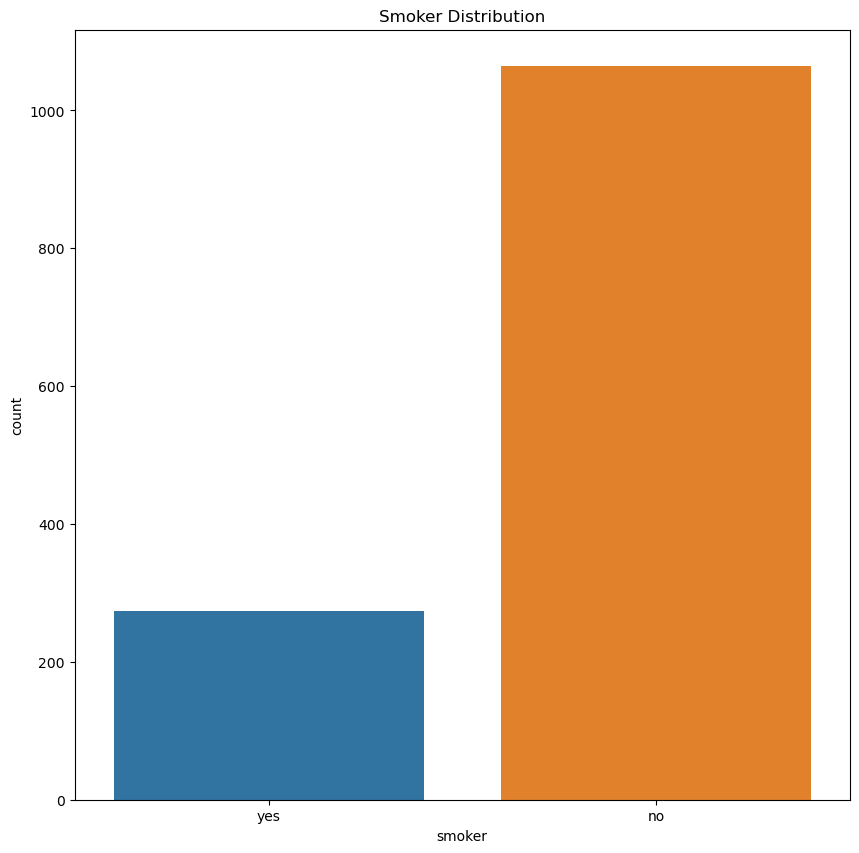

In [11]:
plt.figure(figsize=(10, 10))  # Set the figure size once
sns.countplot(x="smoker", data=data)  # Specify x for the column
plt.title("Smoker Distribution")  # Set the title
plt.show()  # Display the plot

In [12]:
data.drop(["region"], axis=1, inplace=True)

In [13]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [14]:
# Convert sex to numeric: Male = 0, Female = 1
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Convert smoking status to numeric: Non-Smoker = 0, Smoker = 1
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# Display the updated DataFrame
print(data.head())

   age  sex     bmi  children  smoker      charges
0   19    1  27.900         0       1  16884.92400
1   18    0  33.770         1       0   1725.55230
2   28    0  33.000         3       0   4449.46200
3   33    0  22.705         0       0  21984.47061
4   32    0  28.880         0       0   3866.85520


In [15]:
# Define features (X) and target variable (y)
X = data.drop('charges', axis=1)  # All columns except 'charges'
y = data['charges']                 # Target variable


In [26]:
print(X)

      age  sex     bmi  children  smoker
0      19    1  27.900         0       1
1      18    0  33.770         1       0
2      28    0  33.000         3       0
3      33    0  22.705         0       0
4      32    0  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    0  30.970         3       0
1334   18    1  31.920         0       0
1335   18    1  36.850         0       0
1336   21    1  25.800         0       0
1337   61    1  29.070         0       1

[1338 rows x 5 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [16]:
## train, test and split my data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

## STANDARD  SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
## lINEAR  REGRESSION
# Create a Linear Regression model
lin_reg = LinearRegression()
# Fit the model on the training data
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [19]:
import pickle

In [20]:
# save the mode
with open('model_lin.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

In [21]:
pred_lin = lin_reg.predict(X_test)

In [22]:
## create a data frame for predictions
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lin})




,Actual,Predicted
764,9095.06825,8554.817116
887,5272.17580,6973.587467
890,29330.98315,36798.604161
1293,9301.89355,9417.882823
259,33750.29180,26871.680311
...,...,...
109,47055.53210,39220.995889
575,12222.89830,11695.634124
535,6067.12675,7253.598675
543,63770.42801,40950.539904


In [23]:
## MAE
##MSE
## RMSE
## R2   --- 0.99, 0.91  --- 0-1    0.24, 0.11, 0.05, 0.91, 0.92 --- 0.08 

print('MAE:', metrics.mean_absolute_error(Y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lin)))
print('R2:', metrics.r2_score(Y_test, pred_lin))


MAE: 4213.484797807138
MSE: 33979257.05080821
RMSE: 5829.17293025419
R2: 0.7811302113434095


In [127]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=3)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)


mul_reg = LinearRegression(fit_intercept=False)
mul_reg.fit(X_train_2, Y_train)


LinearRegression(fit_intercept=False)

In [128]:
# Predictions
pred_poly_train = mul_reg.predict(X_train_2)
pred_poly_test = mul_reg.predict(X_test_2)

In [134]:
# Create a DataFrame for Polynomial Regression predictions
predictions_poly_df = pd.DataFrame({
    'Actual': Y_test, 
    'Predicted': pred_poly_test
})
# Display the DataFrame
print(predictions_df)

           Actual     Predicted
764    9095.06825  -4791.272620
887    5272.17580  -6372.502269
890   29330.98315  23452.514425
1293   9301.89355  -3928.206913
259   33750.29180  13525.590574
...           ...           ...
109   47055.53210  25874.906153
575   12222.89830  -1650.455612
535    6067.12675  -6092.491062
543   63770.42801  27604.450167
846    9872.70100   -720.123318

[268 rows x 2 columns]


In [136]:
# Calculate evaluation metrics for the test predictions
mae = metrics.mean_absolute_error(Y_test, pred_poly_test)
mse = metrics.mean_squared_error(Y_test, pred_poly_test)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = metrics.r2_score(Y_test, pred_poly_test)

# Print evaluation metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 2859.6283016753728
MSE: 21117269.476912998
RMSE: 4595.353030716247
R²: 0.8639778291648587


In [102]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, Y_train)  

DecisionTreeRegressor(max_depth=5, random_state=13)

In [137]:
# Predictions
pred_tree_train = decision_tree_reg.predict(X_train)
pred_tree_test = decision_tree_reg.predict(X_test)

In [138]:
# Create a DataFrame for Decision Tree Regression predictions
predictions_tree_df = pd.DataFrame({
    'Actual': Y_test, 
    'Predicted': pred_tree_test
})

# Display the DataFrame
print(predictions_tree_df)


           Actual     Predicted
764    9095.06825  10550.640437
887    5272.17580   5243.041297
890   29330.98315  26871.091523
1293   9301.89355  10550.640437
259   33750.29180  34232.778608
...           ...           ...
109   47055.53210  47238.567400
575   12222.89830  12278.490909
535    6067.12675   6941.957358
543   63770.42801  47238.567400
846    9872.70100  10550.640437

[268 rows x 2 columns]


In [141]:
# Calculate evaluation metrics for the test predictions
mae_tree = metrics.mean_absolute_error(Y_test, pred_tree_test)
mse_tree = metrics.mean_squared_error(Y_test, pred_tree_test)
rmse_tree = np.sqrt(mse_tree)  # RMSE is the square root of MSE
r2_tree = metrics.r2_score(Y_test, pred_tree_test)

# Print evaluation metrics
print('Decision Tree Regression Metrics:')
print('MAE:', mae_tree)
print('MSE:', mse_tree)
print('RMSE:', rmse_tree)
print('R²:', r2_tree)



Decision Tree Regression Metrics:
MAE: 2891.6904248556775
MSE: 25840628.549257874
RMSE: 5083.3678353290425
R²: 0.8335533675479523


In [103]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, Y_train)    # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

In [142]:
# Predictions
pred_rf_train = random_forest_reg.predict(X_train)
pred_rf_test = random_forest_reg.predict(X_test)

In [144]:
# Calculate evaluation metrics for the test predictions
mae_rf = metrics.mean_absolute_error(Y_test, pred_rf_test)
mse_rf = metrics.mean_squared_error(Y_test, pred_rf_test)
rmse_rf = np.sqrt(mse_rf)  # RMSE is the square root of MSE
r2_rf = metrics.r2_score(Y_test, pred_rf_test)

# Print evaluation metrics
print('Random Forest Regression Metrics:')
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print('R²:', r2_rf)


Random Forest Regression Metrics:
MAE: 2559.0766914072283
MSE: 19828630.533465043
RMSE: 4452.935047074575
R²: 0.872278308860026


In [105]:
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, Y_train)  

SVR(C=1000, gamma='auto', kernel='linear')

In [145]:
# Predictions
pred_svr_train = support_vector_reg.predict(X_train)
pred_svr_test = support_vector_reg.predict(X_test)

In [146]:
# Calculate evaluation metrics for the test predictions
mae_svr = metrics.mean_absolute_error(Y_test, pred_svr_test)
mse_svr = metrics.mean_squared_error(Y_test, pred_svr_test)
rmse_svr = np.sqrt(mse_svr)  # RMSE is the square root of MSE
r2_svr = metrics.r2_score(Y_test, pred_svr_test)

# Print evaluation metrics
print('Support Vector Regression Metrics:')
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)
print('R²:', r2_svr)


Support Vector Regression Metrics:
MAE: 3186.3049604573466
MSE: 43012519.403787404
RMSE: 6558.393050419241
R²: 0.7229444711690504
